<a href="https://colab.research.google.com/github/sbaez901/CIS-568_med-viz1/blob/main/Create_NetwordX_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint
from google.colab import files



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Week-7-ForceLayout/main/data/data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [ ]:
df.head(8)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN
5,Remote interactive collaboration in facilities...,2019,2-s2.0-85071686342,Facilities Management (FM) day-to-day tasks re...,Elsevier B.V.,NaN,NaN,"El Ammari K., Hammad A.",14628356000;7006162997;,"El Ammari, K., Department of Building, Civil a...",Automation in Construction,Autom Constr,4.0
6,Research on the emergency management pattern a...,2019,2-s2.0-85077803554,Urban waterlogging events have become more fre...,Institute of Physics Publishing,5th International Conference on Water Resource...,16 July 2019 through 19 July 2019,"Yang S.Y., Jiang R.G., Xie J.C., Yu X., Liang ...",57204951915;36656019700;8399981200;57196119394...,"Yang, S.Y., State Key Laboratory of Eco-hydrau...",IOP Conference Series: Earth and Environmental...,IOP Conf. Ser. Earth Environ. Sci.,1.0
7,Web-based decision support system tools: The S...,2019,2-s2.0-85070952871,The current influx of climate related informat...,Elsevier Ltd,NaN,NaN,"McDonald S., Mohammed I.N., Bolten J.D., Pulla...",57210571032;36995837100;6603639150;57208132039...,"McDonald, S., Brigham Young University, Civil ...",Environmental Modelling and Software,Environ. Model. Softw.,3.0


In [ ]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [ ]:
df['First_author_Country']

0             Canada
1              Italy
2             Serbia
3              Japan
4              India
           ...      
565           Canada
566    United States
567      South Korea
568    United States
569           Canada
Name: First_author_Country, Length: 561, dtype: object

<Axes: >

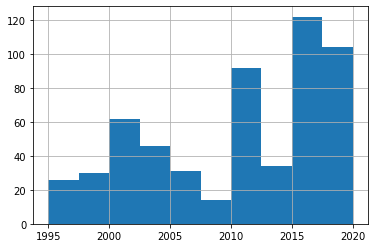

In [ ]:
df.Year.hist()

In [ ]:
#df["Source title"].value_counts().reset_index()
df["Publisher"].value_counts().reset_index()


,index,Source title
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [ ]:
nodes = df['EID'].values
df = df.fillna(0)

In [ ]:
df['Year'].max()

2020

In [ ]:
G = nx.Graph()

In [ ]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'],{
      "Title": row[1]['Title'],
      "Year" : row[1]['Year'],
      "Citations" : row[1]['Cited by'],
      "Publisher" : row[1]['Publisher'],
  }))

In [ ]:
len(nodes)

561

In [ ]:
data = {"nodes": [], "links": []}

In [ ]:
nodes[0]

('2-s2.0-85086464158',
 {'Title': 'Virtual reality applications for the built environment: Research trends and opportunities',
  'Year': 2020,
  'Citations': 0.0,
  'Publisher': 'Elsevier B.V.'})

In [ ]:
G.add_nodes_from(nodes)

In [ ]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ";" in row[1]['Author(s) ID']: 
    authors = row[1]['Author(s) ID'][:-1].split(";")
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers)>0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper,paper))
  else:
    continue

In [ ]:
G.add_edges_from(edges)

In [ ]:
#pos = nx.drawing.circular_layout(G)
pos = nx.spring_layout(G)

In [ ]:
#data = {"nodes": [], "links": []}

#for node in G.nodes():
#   data["nodes"].append({"id": node})

#for edge in G.edges():
#    data["links"].append({"source": edge[0], "target": edge[1]})

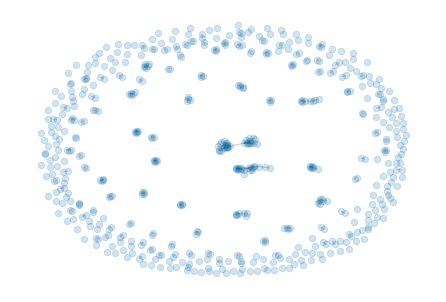

In [ ]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [ ]:
from networkx.readwrite import json_graph

In [ ]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

  files.download("publication_network.json")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open("graph.json", "w") as outfile:
    json.dump(data, outfile, indent=4)
files.download("graph.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open("publication.json",'w') as f:
  json.dump(node_link_data(G),f)

  files.download("publication.json")



NameError: ignored

In [ ]:
#nx.write_gml(G,"network.gml")

In [ ]:
# convert the graph to Gephi
nx.write_gml(G, '/content/drive/MyDrive/network2.gml')